In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("project1.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


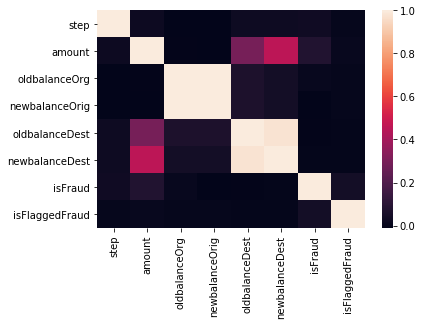

In [22]:
sns.heatmap(df.corr())

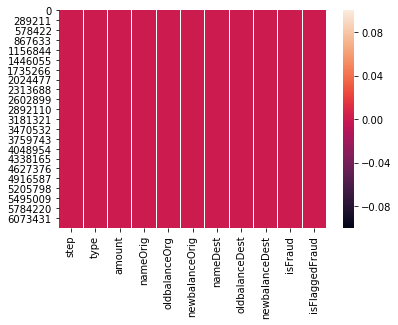

In [23]:
sns.heatmap(df.isnull())

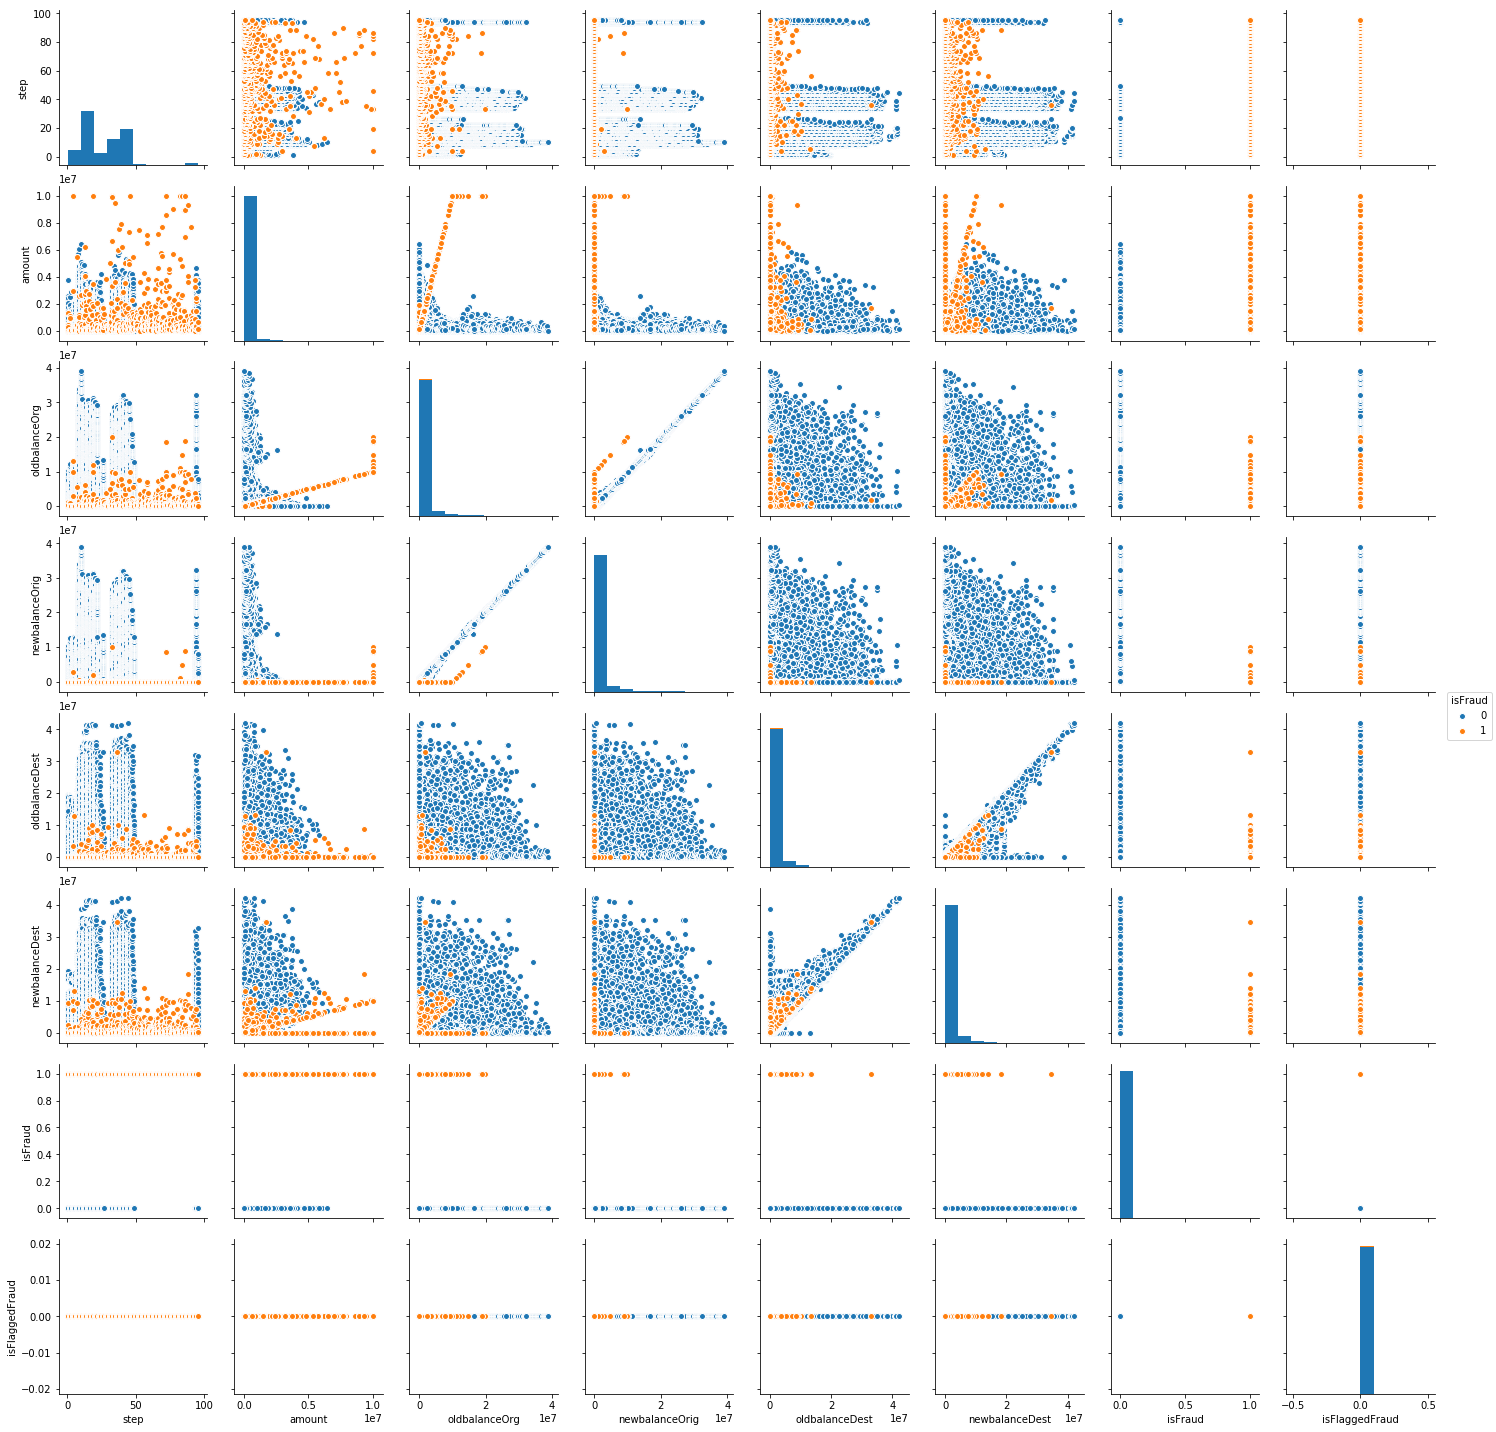

In [8]:
sns.pairplot(data=df,hue='isFraud')

In [4]:
dfFraudTransfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
len(dfFraudTransfer)

4097

In [5]:
dfFraudCashout = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]
len(dfFraudCashout)

4116

In [6]:
df[df['isFlaggedFraud']==1].count()['isFlaggedFraud']

16

In [27]:
df[df['isFlaggedFraud']==0].max()['amount']

92445516.64

In [ ]:
#drop it because wrong

In [28]:
df[df['isFlaggedFraud']==1].min()['amount']

353874.22

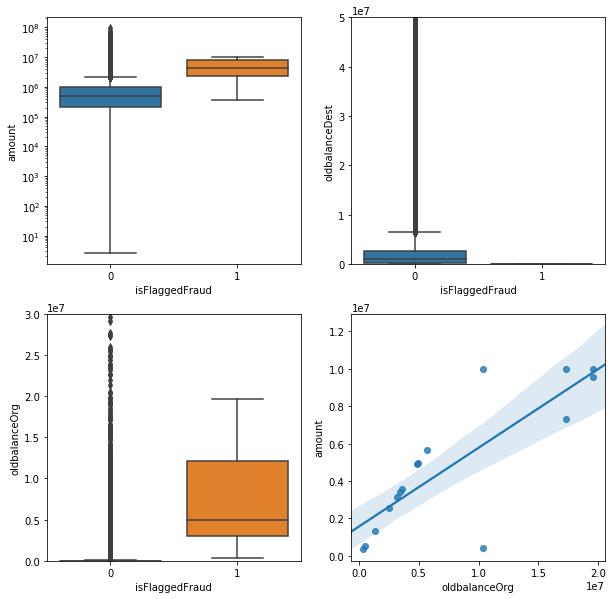

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
tmp = df.loc[(df.type == 'TRANSFER'), :]

a = sns.boxplot(x = 'isFlaggedFraud', y = 'amount', data = tmp, ax=axs[0][0])
axs[0][0].set_yscale('log')
b = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceDest', data = tmp, ax=axs[0][1])
axs[0][1].set(ylim=(0, 0.5e8))
c = sns.boxplot(x = 'isFlaggedFraud', y = 'oldbalanceOrg', data=tmp, ax=axs[1][0])
axs[1][0].set(ylim=(0, 3e7))
d = sns.regplot(x = 'oldbalanceOrg', y = 'amount', data=tmp.loc[(tmp.isFlaggedFraud ==1), :], ax=axs[1][1])
plt.show()


It can be easily seen that transactions with *isFlaggedFraud* 
set occur at
all values of *step*, similar to the complementary set of transactions. Thus
*isFlaggedFraud* does not correlate with *step* either and is therefore
seemingly unrelated to any explanatory variable or feature in the data

*Conclusion*: Although *isFraud* is always set when *isFlaggedFraud* is set, since
*isFlaggedFraud* is set just 16 times in a seemingly meaningless way, we 
can treat this feature as insignificant and discard it in the dataset 
without loosing information.

In [7]:
def func(s):
    for i in s:
        if(i=='M'):
            return True
        else:
            return False
func('Merchant')


True

In [8]:
df.loc[df.type == 'CASH_IN'].nameOrig.apply(func).value_counts()

False    1399284
Name: nameOrig, dtype: int64

In [9]:
df.loc[df.type == 'PAYMENT'].nameOrig.apply(func).value_counts()

False    2151495
Name: nameOrig, dtype: int64

In [10]:
df.loc[df.type == 'PAYMENT'].nameDest.apply(func).value_counts()

True    2151495
Name: nameDest, dtype: int64

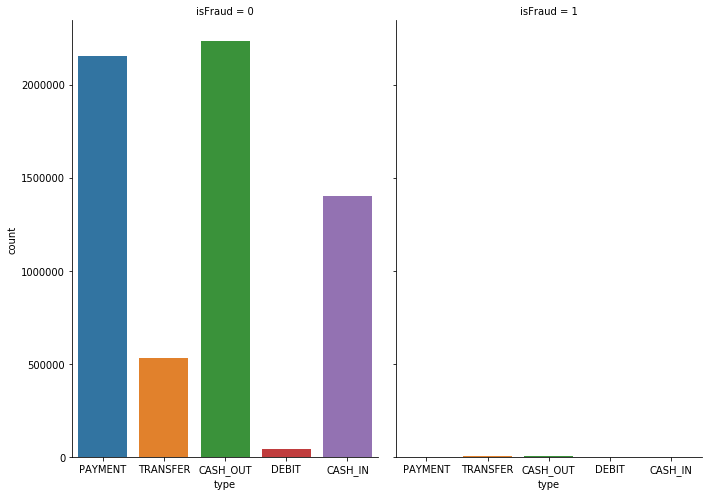

In [34]:
sns.factorplot(x="type",col='isFraud',data = df,kind ='count',size=7,aspect=.7)

In [11]:
p=len(df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount) & (df.isFraud == 0)])

In [12]:
p

2313206

In [13]:
q=df.count()['isFraud']

In [14]:
(p/q)*100

36.35618660237449

In [15]:
r=len(df.loc[(df.oldbalanceDest == 0) & (df.newbalanceDest == 0) & (df.amount) & (df.isFraud == 1)])

In [40]:
(r/q)*100

0.06396735935825179

# Data Cleaning

In [16]:
X = df.loc[(df['type'] == 'TRANSFER') | (df['type'] == 'CASH_OUT')]

In [17]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [18]:
X.reset_index(inplace=True,drop=True)

In [19]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
1,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
2,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
3,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
4,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [20]:
# Eliminate columns shown to be irrelevant for analysis in the EDA
X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud','step'], axis = 1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,TRANSFER,181.00,181.0,0.0,0.0,0.00,1
1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1
2,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0
3,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0
4,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0


In [22]:
X.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [23]:
typee = pd.get_dummies(X['type'],drop_first=True)

In [24]:
typee.head()

,TRANSFER
0,1
1,0
2,0
3,1
4,1


In [25]:
NewData = pd.concat([X,typee],axis=1)

In [26]:
NewData.drop(['type'],inplace=True,axis=1)

In [27]:
NewData.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
0,181.00,181.0,0.0,0.0,0.00,1,1
1,181.00,181.0,0.0,21182.0,0.00,1,0
2,229133.94,15325.0,0.0,5083.0,51513.44,0,0
3,215310.30,705.0,0.0,22425.0,0.00,0,1
4,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [28]:
NewData.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'TRANSFER'],
      dtype='object')

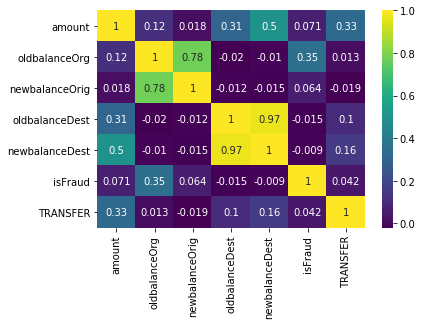

In [54]:
sns.heatmap(NewData.corr(),annot=True,cmap='viridis')

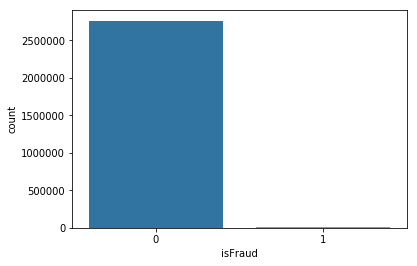

In [55]:
sns.countplot(x='isFraud',data=NewData)

In [29]:
frauds = len(NewData[NewData['isFraud'] == 1])

In [30]:
fraud_indices = NewData[NewData.isFraud == 1].index

In [31]:
non_fraud_indices = NewData[NewData.isFraud == 0].index

In [32]:
non_frauds = len(NewData[NewData['isFraud'] == 0])

In [219]:
np.random.seed(0)
random_indices = np.random.choice(non_fraud_indices,frauds, replace=False)
len(random_indices)

8213

In [220]:
under_sample_indices1 = np.concatenate([random_indices,fraud_indices],axis =0)

In [221]:
len(under_sample_indices1)

16426

In [222]:
under_sample1 = NewData.loc[under_sample_indices1]

In [223]:
under_sample1[under_sample1['isFraud']==0].count()

amount            8213
oldbalanceOrg     8213
newbalanceOrig    8213
oldbalanceDest    8213
newbalanceDest    8213
isFraud           8213
TRANSFER          8213
dtype: int64

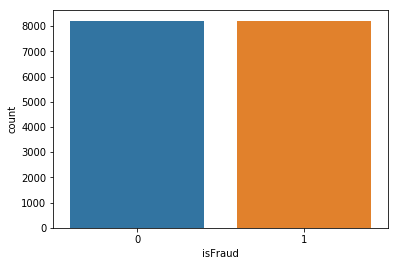

In [224]:
sns.countplot(x='isFraud',data=under_sample1)

In [225]:
under_sample1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
804676,200978.67,6592.0,0.0,0.00,200978.67,0,0
696338,133246.97,0.0,0.0,288141.15,421388.12,0,0
2099434,2875864.54,15011.0,0.0,0.00,2875864.54,0,1
2514839,293331.60,0.0,0.0,491315.07,784646.67,0,0
1990355,201668.50,0.0,0.0,2025944.19,2227612.69,0,0


In [226]:
under_sample1.reset_index(inplace=True,drop=True)

In [227]:
under_sample1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
0,200978.67,6592.0,0.0,0.00,200978.67,0,0
1,133246.97,0.0,0.0,288141.15,421388.12,0,0
2,2875864.54,15011.0,0.0,0.00,2875864.54,0,1
3,293331.60,0.0,0.0,491315.07,784646.67,0,0
4,201668.50,0.0,0.0,2025944.19,2227612.69,0,0


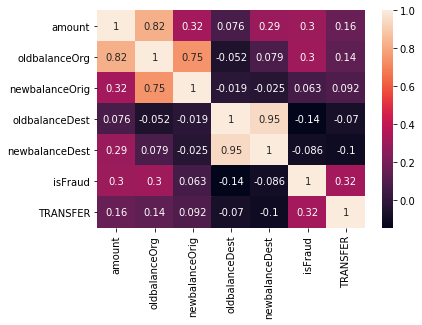

In [171]:
sns.heatmap(under_sample1.corr(),annot=True)

In [172]:
under_sample1.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,TRANSFER
0,200978.67,6592.0,0.0,0.00,200978.67,0,0
1,133246.97,0.0,0.0,288141.15,421388.12,0,0
2,2875864.54,15011.0,0.0,0.00,2875864.54,0,1
3,293331.60,0.0,0.0,491315.07,784646.67,0,0
4,201668.50,0.0,0.0,2025944.19,2227612.69,0,0


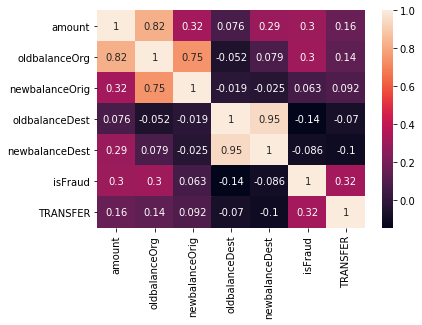

In [173]:
sns.heatmap(under_sample1.corr(),annot=True)

# Linear Regsion

In [174]:
x = under_sample1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','TRANSFER']]

In [175]:
y = under_sample1['isFraud']

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
lm = LinearRegression()

In [180]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [181]:
print(lm.intercept_)

0.33482982673659967


In [182]:
lm.coef_

array([-1.77265039e-07,  2.49017655e-07, -2.61097832e-07, -4.23396557e-08,
        4.03081530e-08,  3.47677654e-01])

In [183]:
pred = lm.predict(x_test)

In [184]:
pred

array([0.30846832, 0.48498503, 0.68003985, ..., 0.58553905, 0.34916305,
       0.32622449])

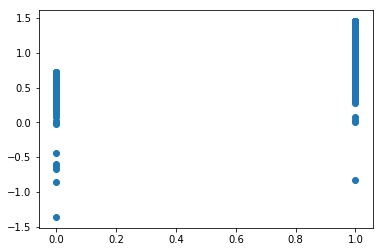

In [185]:
plt.scatter(y_test,pred)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


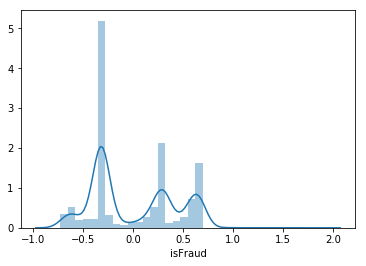

In [186]:
sns.distplot((y_test-pred),kde=True)

In [187]:
from sklearn import metrics

In [188]:
metrics.mean_absolute_error(y_test,pred)

0.3860898235190546

# Logistic Regression

In [189]:
x = under_sample1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','TRANSFER']]

In [190]:
y = under_sample1['isFraud']

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
X_under_train, X_under_test, y_under_train, y_under_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

In [193]:
from sklearn.linear_model import LogisticRegression

In [194]:
lr_under = LogisticRegression()

In [195]:
lr_under.fit(X_under_train,y_under_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [196]:
y_under_pred = lr_under.predict(X_under_test)

In [197]:
from sklearn.metrics import classification_report,confusion_matrix

In [198]:
print(classification_report(y_under_test,y_under_pred))

             precision    recall  f1-score   support

          0       0.97      0.88      0.92      2484
          1       0.89      0.97      0.93      2444

avg / total       0.93      0.93      0.93      4928



In [199]:
print(confusion_matrix(y_under_test,y_under_pred))

[[2189  295]
 [  72 2372]]


In [200]:
from sklearn.metrics import roc_curve

In [201]:
fpr, tpr,_=roc_curve(y_under_pred,y_under_test,drop_intermediate=False)

In [202]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

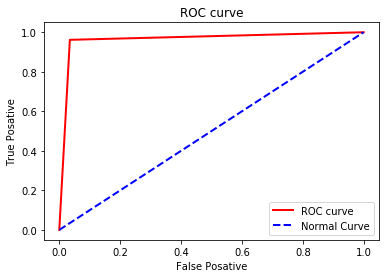

In [256]:
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--',label = 'Normal Curve')
##Title and label
plt.xlabel('False Posative')
plt.ylabel('True Posative')
plt.title('ROC curve')
plt.legend()
plt.show()

# K-NN Algorithm


In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
scalar = StandardScaler()

In [206]:
scalar.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [207]:
scaled_features = scalar.transform(x)

In [208]:
df_feat = pd.DataFrame(scaled_features,columns = x.columns)

In [209]:
df_feat.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,TRANSFER
0,-0.363990,-0.318615,-0.074574,-0.276949,-0.320205,-0.730062
1,-0.399606,-0.321117,-0.074574,-0.206708,-0.272394,-0.730062
2,1.042561,-0.315421,-0.074574,-0.276949,0.260028,1.369746
3,-0.315427,-0.321117,-0.074574,-0.157180,-0.193596,-0.730062
4,-0.363627,-0.321117,-0.074574,0.216919,0.119410,-0.730062


In [210]:
from sklearn.model_selection import train_test_split

In [211]:
x1=df_feat[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest', 'TRANSFER']]

In [212]:
y=under_sample1['isFraud']

In [213]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y, test_size=0.3, random_state=101)

In [214]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier(n_neighbors=1)
Knn.fit(x1_train,y1_train)
pred=Knn.predict(x1_test)
pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [215]:
from sklearn.metrics import classification_report,confusion_matrix

In [216]:
print(confusion_matrix(y1_test,pred))


[[2390   94]
 [  86 2358]]


In [217]:
print(classification_report(y1_test,pred))

             precision    recall  f1-score   support

          0       0.97      0.96      0.96      2484
          1       0.96      0.96      0.96      2444

avg / total       0.96      0.96      0.96      4928



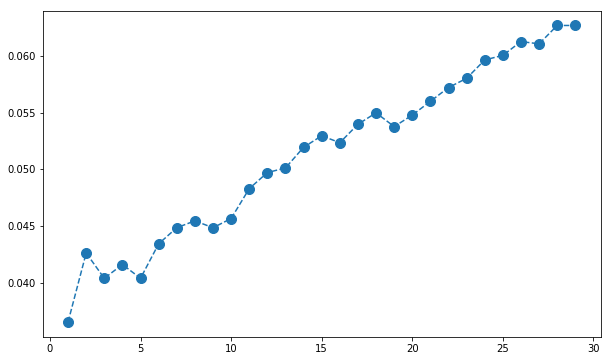

In [218]:
error_rate=[]
for i in range(1,30):
    Knn=KNeighborsClassifier(n_neighbors=i)
    Knn.fit(x1_train,y1_train)
    pred_i=Knn.predict(x1_test)
    error_rate.append(np.mean(pred_i!=y1_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,linestyle='dashed',marker='o',markersize=10)

In [233]:
fpr1, tpr1,_=roc_curve(pred,y1_test,drop_intermediate=False)

In [234]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

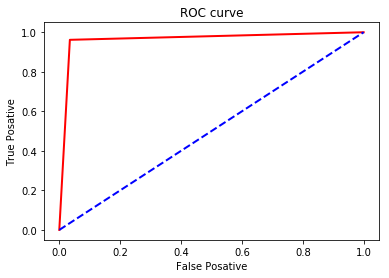

In [235]:
plt.plot(fpr1, tpr1, color='red',
 lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Posative')
plt.ylabel('True Posative')
plt.title('ROC curve')
plt.show()

# decision_trees


In [136]:
from sklearn.model_selection import train_test_split
x2= under_sample1[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest','TRANSFER']]
y2=under_sample1[['isFraud']]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.3, random_state=101)

In [137]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x2_train,y2_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [236]:
pre=dtree.predict(x2_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y2_test,pre))
print(classification_report(y2_test,pre))

[[2441   43]
 [  26 2418]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      2484
          1       0.98      0.99      0.99      2444

avg / total       0.99      0.99      0.99      4928



In [238]:
fpr1, tpr1,_=roc_curve(pre,y2_test,drop_intermediate=False)

In [239]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

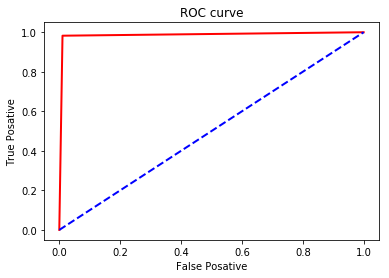

In [240]:
plt.plot(fpr1, tpr1, color='red',
 lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Posative')
plt.ylabel('True Posative')
plt.title('ROC curve')
plt.show()

# Random_Forest_Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000)
rfc.fit(x2_train,y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [242]:
rfc_pred=rfc.predict(x2_test)
print(confusion_matrix(y2_test,rfc_pred))
print(classification_report(y2_test,rfc_pred))

[[2436   48]
 [  15 2429]]
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      2484
          1       0.98      0.99      0.99      2444

avg / total       0.99      0.99      0.99      4928



In [243]:
fpr1, tpr1,_=roc_curve(rfc_pred,y2_test,drop_intermediate=False)

In [244]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

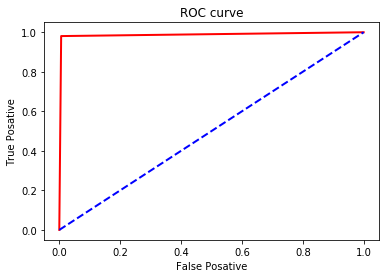

In [245]:
plt.plot(fpr1, tpr1, color='red',
 lw=2, label='ROC curve')

##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('False Posative')
plt.ylabel('True Posative')
plt.title('ROC curve')
plt.show()

# Gaussian_Naive_classifier

In [122]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x2_train,y2_train)
predicted=model.predict(x2_test)
print(predicted)

[0 1 0 ... 1 0 0]


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [123]:
print(confusion_matrix(y2_test,predicted))
print(classification_report(y2_test,predicted))

[[2411   73]
 [1205 1239]]
             precision    recall  f1-score   support

          0       0.67      0.97      0.79      2484
          1       0.94      0.51      0.66      2444

avg / total       0.80      0.74      0.73      4928



# Support Vector Machine

In [139]:
from sklearn.svm import SVC

In [140]:
model = SVC()

In [142]:
model.fit(x2_train,y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [143]:
pred = model.predict(x2_test)

In [144]:
print(confusion_matrix(y2_test,pred))
print(classification_report(y2_test,pred))

[[2484    0]
 [2400   44]]
             precision    recall  f1-score   support

          0       0.51      1.00      0.67      2484
          1       1.00      0.02      0.04      2444

avg / total       0.75      0.51      0.36      4928



In [246]:
from sklearn.grid_search import GridSearchCV

In [252]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.01,0.001]}

In [253]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [254]:
grid.fit(x2_train,y2_train)

IndexError: too many indices for array